# Data Preparation Basics

### Segment 1 - Filtering and selecting data

In [7]:
import sys
print("Python version:", sys.version)

Python version: 3.11.1 (v3.11.1:a7a450f84a, Dec  6 2022, 15:24:06) [Clang 13.0.0 (clang-1300.0.29.30)]


In [8]:
# pip install matplotlib

In [9]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

## You can write a index in two forms
### label index and integer index

In [10]:
series_obj = Series(np.arange(8), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int64

In [11]:
series_obj['row 4']

3

In [12]:
series_obj[[0,7]]

/var/folders/4d/2wq09dc5575f0fr7yyh3117c0000gn/T/ipykernel_48660/454169067.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series_obj[[0,7]]


row 1    0
row 8    7
dtype: int64

In [13]:
np.random.seed(25) #np.random.seed(any_int) makes the random numbers predictable, for every int the set is diff

df_obj = DataFrame(np.random.rand(36).reshape((6,6)), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'],
                  columns=['col 1', 'col 2', 'col 3', 'col 4', 'col 5', 'col 6'])
df_obj

,col 1,col 2,col 3,col 4,col 5,col 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [14]:
df_obj.loc[['row 1', 'row 3'], ['col 2', 'col 6']]

,col 2,col 6
row 1,0.582277,0.117376
row 3,0.585445,0.699186


## Data Slicing - uses indexes

In [15]:
series_obj['row 3': 'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int64

## comparing with scalars

In [16]:
df_obj < .2

,col 1,col 2,col 3,col 4,col 5,col 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


In [17]:
series_obj[series_obj > 6]

row 8    7
dtype: int64

## Setting values with Scalars

In [18]:
series_obj[['row 1', 'row 5', 'row 8']] = 8
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int64

# Data Preparation Basics
## Treating missing values

In [19]:
missing = np.nan

series_obj_missing = Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj_missing

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [20]:
series_obj_missing.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [21]:
np.random.seed(25)
df_onj_missing = DataFrame(np.random.rand(36).reshape(6,6))
df_onj_missing

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [22]:
df_onj_missing.loc[3:5, 0] = missing
df_onj_missing.loc[1:4, 5] = missing
df_onj_missing

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [23]:
filled_df = df_onj_missing.fillna(0)
filled_df

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [24]:
filled_df = df_onj_missing.fillna({0: 0.1, 5:1.25})
filled_df

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [25]:
fill_df = df_onj_missing.fillna(method='ffill') #forward fill
fill_df

/var/folders/4d/2wq09dc5575f0fr7yyh3117c0000gn/T/ipykernel_48660/839397566.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_df = df_onj_missing.fillna(method='ffill') #forward fill


,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


In [26]:
df_onj_missing.isnull().sum() #gives the no. of null values in the df - here, 0th 5 nan and 5th col 4 nan values

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

In [27]:
df_onj_missing_no_nan = df_onj_missing.dropna() #we got only 1 row here bcz only 1 row had no null values
df_onj_missing_no_nan

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [28]:
df_onj_missing_no_nan = df_onj_missing.dropna(axis=1) #this dropped the columns with nan values thus middle 4 column remained
df_onj_missing_no_nan

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


## Treating Duplicate Values

In [29]:
df_obj_duplicate = DataFrame({'col 1': [1,1,2,2,3,3,3], 
                              'col 2': ['a','a','b', 'c', 'd', 'd', 'd'],
                              'col 3': ['A', 'A', 'B', 'C', 'D', 'E', 'E']})
df_obj_duplicate

,col 1,col 2,col 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,c,C
4,3,d,D
5,3,d,E
6,3,d,E


In [30]:
df_obj_duplicate.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [31]:
df_obj_duplicate.drop_duplicates()

,col 1,col 2,col 3
0,1,a,A
2,2,b,B
3,2,c,C
4,3,d,D
5,3,d,E


In [32]:
df_obj_duplicate1 = DataFrame({'col 1': [1,1,2,2,3,3,3], 
                              'col 2': ['a','a','b', 'c', 'd', 'd', 'd'],
                              'col 3': ['A', 'A', 'B', 'C', 'D', 'E', 'F']})
df_obj_duplicate1

,col 1,col 2,col 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,c,C
4,3,d,D
5,3,d,E
6,3,d,F


In [33]:
df_obj_duplicate1.drop_duplicates(['col 2'])
df_obj_duplicate1

,col 1,col 2,col 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,c,C
4,3,d,D
5,3,d,E
6,3,d,F


## Concatenation and Transformation of data

In [34]:
df_obj_concatenation = pd.DataFrame(np.arange(36).reshape(6,6))
df_obj_concatenation

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [35]:
df_obj_concatenation1 = pd.DataFrame(np.arange(15).reshape(5,3))
df_obj_concatenation1

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


### Concatenating Data using pandas

In [36]:
pd.concat([df_obj_concatenation,df_obj_concatenation1], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [37]:
pd.concat([df_obj_concatenation,df_obj_concatenation1])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


### Dropping Data

In [38]:
df_obj_concatenation.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [39]:
df_obj_concatenation.drop([0,2], axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


### Adding data

In [40]:
series_obj_adding_data = Series(np.arange(6))
series_obj_adding_data.name = "added variable"
series_obj_adding_data

0    0
1    1
2    2
3    3
4    4
5    5
Name: added variable, dtype: int64

In [41]:
variable_added = DataFrame.join(df_obj_concatenation, series_obj_adding_data)
variable_added

,0,1,2,3,4,5,added variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


### Sort Data

In [42]:
df_sorted = df_obj_concatenation.sort_values(by=(5), ascending=False)
df_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


## Grouping and data aggregation

In [43]:
address = "/Users/tanyasrivastava/Documents/Python For Data Science Practice notebooks/practice-repo/mtcars.csv"
cars = pd.read_csv(address)

cars.columns = ['cars_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,cars_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [44]:
cars_groupby = cars.groupby(cars['cyl'])
cars_groupby.first()

,cars_name,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,,
4,Datsun 710,22.8,108.0,93,3.85,2.32,18.61,1,1,4,1
6,Mazda RX4,21.0,160.0,110,3.90,2.62,16.46,0,1,4,4
8,Hornet Sportabout,18.7,360.0,175,3.15,3.44,17.02,0,0,3,2


In [45]:
cars_groupby = cars.groupby(cars['am'])
cars_groupby.max()

,cars_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,,
0,Valiant,24.4,8,472.0,245,3.92,5.424,22.9,1,4,4
1,Volvo 142E,33.9,8,351.0,335,4.93,3.570,19.9,1,5,8


## Data Visualization

### Two methods of plot building 
#### 1. Funtional Method
#### 2. Object-Oriented Method

##### AI driven color match tool - Colormind

In [46]:
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams

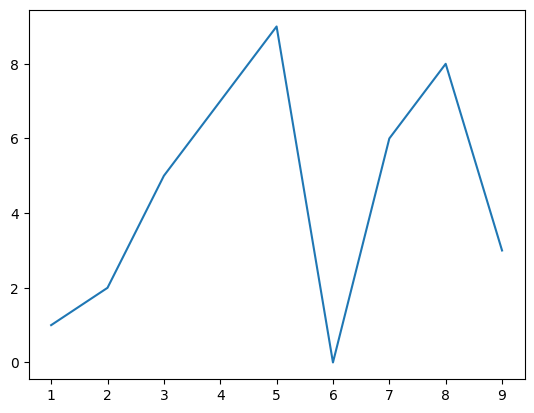

In [47]:
x = range(1,10)
y = [1,2,5,7,9,0,6,8,3]

plt.plot(x,y)

In [48]:
mpg = cars['mpg']

<Axes: >

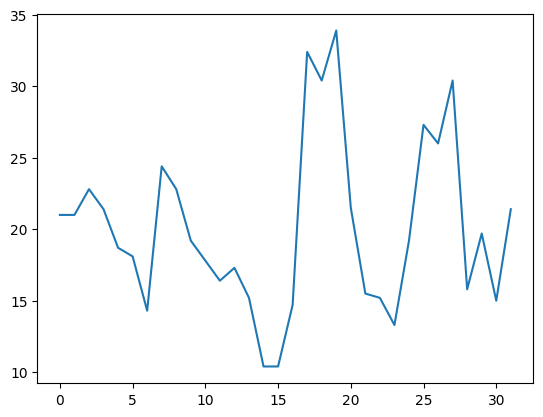

In [49]:
mpg.plot()

<Axes: >

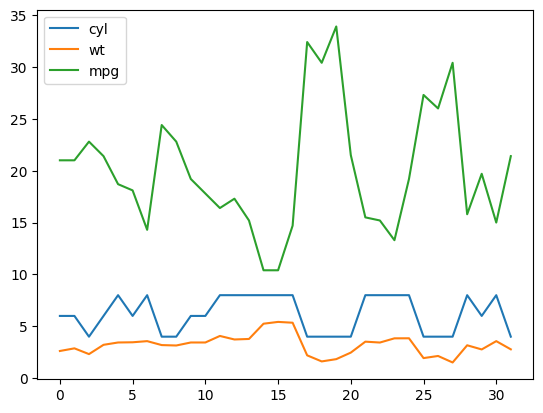

In [50]:
df = cars[['cyl','wt', 'mpg']]
df.plot()

<BarContainer object of 9 artists>

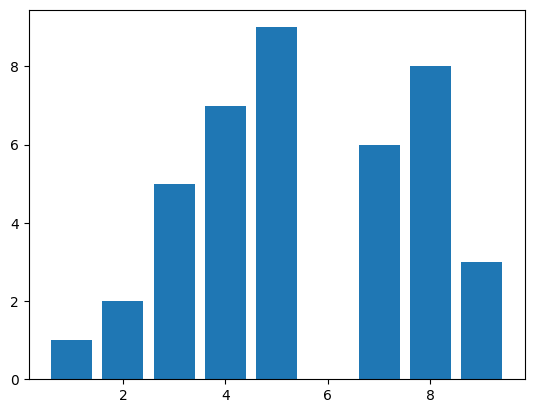

In [52]:
#Creating Bar chart
plt.bar(x, y)

<Axes: >

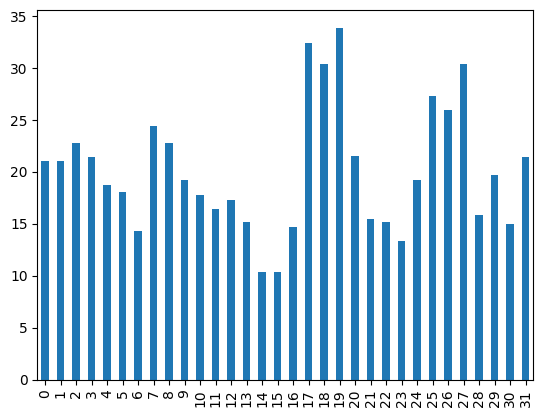

In [53]:
mpg.plot(kind='bar')

<Axes: >

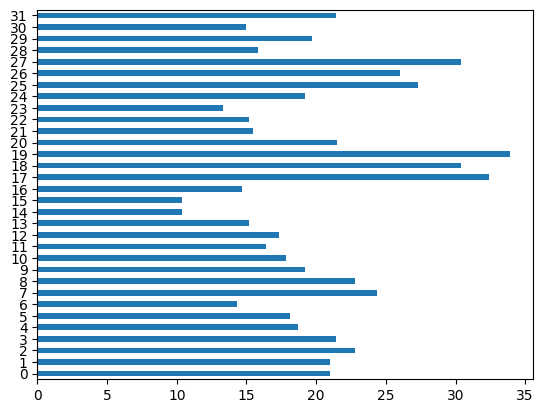

In [54]:
mpg.plot(kind='barh')

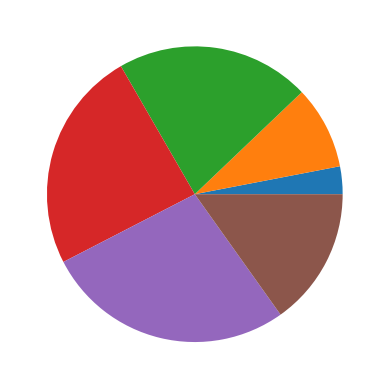

<Figure size 640x480 with 0 Axes>

In [57]:
x = [1,3,7,8,9,5]
plt.pie(x)
plt.show()
plt.savefig('piechart.png') #saving the plot using plt

In [59]:
%matplotlib inline #This line tells Jupyter to display Matplotlib plots directly in the output of the notebook

UsageError: unrecognized arguments: #This line tells Jupyter to display Matplotlib plots directly in the output of the notebook


In [60]:
rcParams['figure.figsize'] = 5,4 #defines figure size

#### Defining axes, ticks and grids

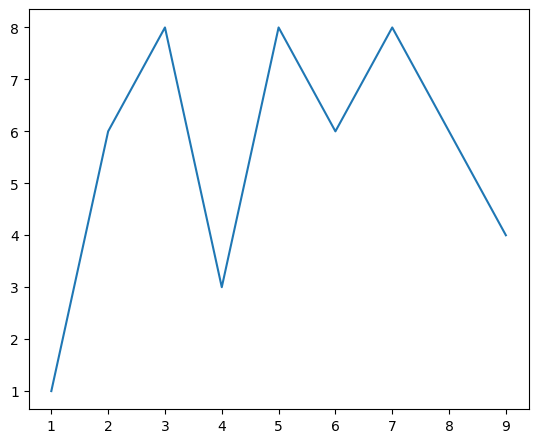

In [61]:
x = range(1,10)
y = [1,6,8,3,8,6,8,6,4]

fig = plt.figure() #creating empty figure step 1 of object oriented method
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x,y)

In [ ]:
fig = plt.figure() #creating empty figure step 1 of object oriented method
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_yticks()